#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
import math
%matplotlib inline

#### Import data

In [2]:
df = pd.read_csv('AIML_C7_April 2022_Data_miniproject.csv')

### Problem statement
The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:
1.	Height – The height of the bag
2.	Width – The width of the bag
3.	Length – The length of the bag
4.	Weight – The weight the bag can carry
5.	Weight1 – Weight the bag can carry after expansion
6.	Color - Color of the Bag 
<br>

The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes . As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. 


### Task 1:  Analyse the dataset and do EDA (Exploratory Data Analysis) 

##### 1.1 : Understand data using methods like head(), describe() and info()

In [3]:
df.head()

,Cost,Weight,Weight1,Length,Height,Width,Color
0,242.0,23.2,25.4,30,11.5200,4.02,Green
1,290.0,24,26.3,31.2,12.4800,4.3056,Red
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Yellow
3,363.0,26.3,29,33.5,12.7300,4.4555,Green
4,430.0,26.5,29,34.25,12.4440,5.134,Red


In [4]:
df.describe()

,Cost,Height
count,159.000000,158.000000
mean,398.326415,8.933124
std,357.978317,4.273069
min,0.000000,1.728400
25%,120.000000,5.940600
50%,273.000000,7.733000
75%,650.000000,12.248700
max,1650.000000,18.957000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Cost       159 non-null float64
Weight     159 non-null object
Weight1    159 non-null object
Length     159 non-null object
Height     158 non-null float64
Width      158 non-null object
Color      159 non-null object
dtypes: float64(2), object(5)
memory usage: 8.8+ KB


##### 1.2 : Checking is there any null values

In [6]:
df.isnull().any()

Cost       False
Weight     False
Weight1    False
Length     False
Height      True
Width       True
Color      False
dtype: bool

In [7]:
df.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
Color      0
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,Cost,Weight,Weight1,Length,Height,Width,Color
14,600.0,29.4,32.25,37.2,NaN,5.1708,Yellow
148,9.7,10.4,11,12,2.196,NaN,Red


##### As Color column contains string values so we will convert into numberic format

In [9]:
df['Color'].unique()

array(['Green', 'Red', 'Yellow'], dtype=object)

In [10]:
# As we have three different colors so we will convert it into number
df['Color'].replace(['Green', 'Red', 'Yellow'], [0.0, 1.0, 2.0], inplace=True)

##### As data type of column Weight, Weight1, Length, Width are numerical data points but there data type is object in dataframe. It means this columns contains some non numerical data point which may got inserted by mistake. So if we try to convert this columns into numberic then we will get exceptions. To avoid it we will supress error using errors='coerce' and convert this columns to numerical column

In [11]:
df[["Weight", "Weight1", "Length", "Width"]] = df[["Weight", "Weight1", "Length", "Width"]].apply(pd.to_numeric, errors='coerce')

In [12]:
df[df.isna().any(axis=1)]

,Cost,Weight,Weight1,Length,Height,Width,Color
5,450.0,26.8,29.00,NaN,13.6024,NaN,2.0
6,500.0,26.8,29.00,NaN,14.1795,5.2785,0.0
9,500.0,NaN,NaN,36.20,14.2266,4.9594,0.0
14,600.0,29.4,32.25,37.20,NaN,5.1708,2.0
49,161.0,NaN,23.40,26.70,6.9153,3.6312,1.0
56,270.0,24.1,26.50,NaN,8.1454,4.2485,2.0
109,514.0,30.5,NaN,34.25,10.0300,6.0180,1.0
128,200.0,30.0,NaN,NaN,5.5680,3.3756,2.0
148,9.7,10.4,11.00,12.00,2.1960,NaN,1.0


##### Now we have more number of data points with NaN value. Instead of removing them we will replace them with median value of column Weight, Weight1, Length, Width. It will help us to avoid impact of outliers.

In [13]:
df[["Weight", "Weight1", "Length", "Height", "Width"]] = df[["Weight", "Weight1", "Length", "Height", "Width"]].fillna(value=df[["Weight", "Weight1", "Length", "Height", "Width"]].median())

In [14]:
df[df.isna().any(axis=1)]

,Cost,Weight,Weight1,Length,Height,Width,Color


In [15]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width,Color
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.246541,28.316667,31.127987,8.925576,3777.977521,1.000000
std,357.978317,9.989816,10.707961,11.604785,4.260588,47582.744610,0.819076
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.401600,0.000000
50%,273.000000,25.200000,26.750000,29.200000,7.733000,4.248500,1.000000
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.584500,2.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000,2.000000


###### Now we replaced all NaN values with mean value of column

##### 1.3: Use seaborn jointplot to compare the Cost with remaining feature and check does it having any correlation

###### 1.3.1: Seaborn jointplot: Compare Cost and Weight

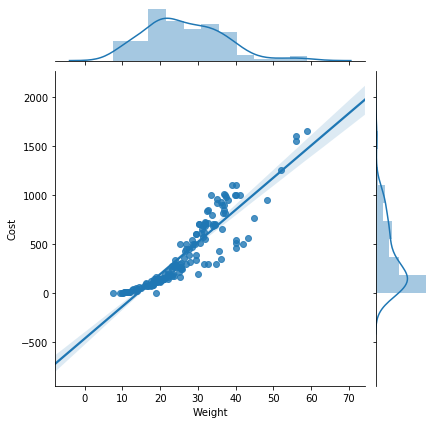

In [16]:
sns.jointplot(x="Weight", y="Cost", kind="reg", data=df)

###### 1.3.2: Seaborn jointplot: Compare Cost and Weight1

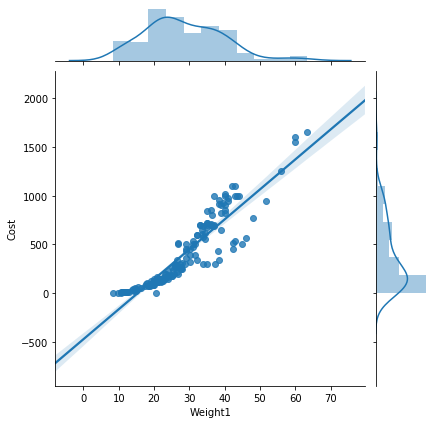

In [17]:
sns.jointplot(x="Weight1", y="Cost", kind="reg", data=df)

###### 1.3.3: Seaborn jointplot: Compare Cost and Length

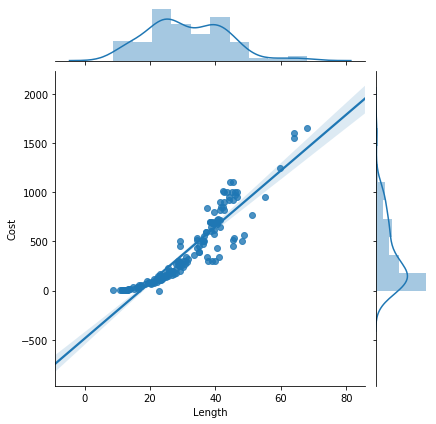

In [18]:
sns.jointplot(x="Length", y="Cost", kind="reg", data=df)

###### 1.3.4: Seaborn jointplot: Compare Cost and Height

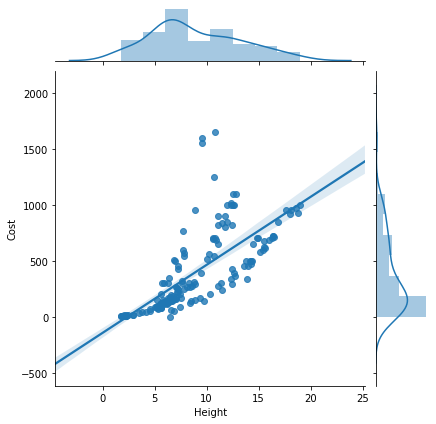

In [19]:
sns.jointplot(x="Height", y="Cost", kind="reg", data=df)

###### 1.3.4: Seaborn jointplot: Compare Cost and Color

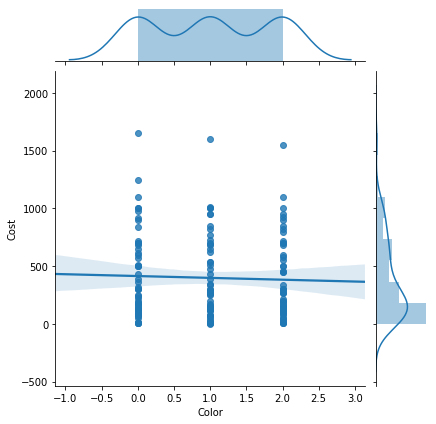

In [20]:
sns.jointplot(x="Color", y="Cost", kind="reg", data=df)

##### 1.4: Check frequency of values in column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECB779048>,
      dtype=object)

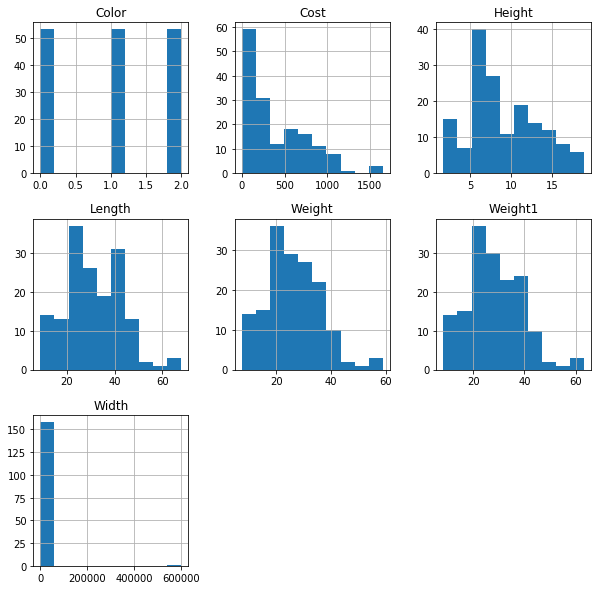

In [21]:
df.hist(figsize=(10,10))

##### 1.6: Outlier of Width feature

##### From above histogram looks like width is having extreme outlier and it may create bad impace on remaining EDA. Hence we will remove first outlier of width

In [22]:
df[df['Width'] > 20]

,Cost,Weight,Weight1,Length,Height,Width,Color
142,1600.0,56.0,60.0,64.0,9.6,600000.0,1.0


##### As only one value is greater than 20 hence we will remove it 

In [23]:
df.drop(df[df['Width'] > 20].index, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECBD3F248>,
      dtype=object)

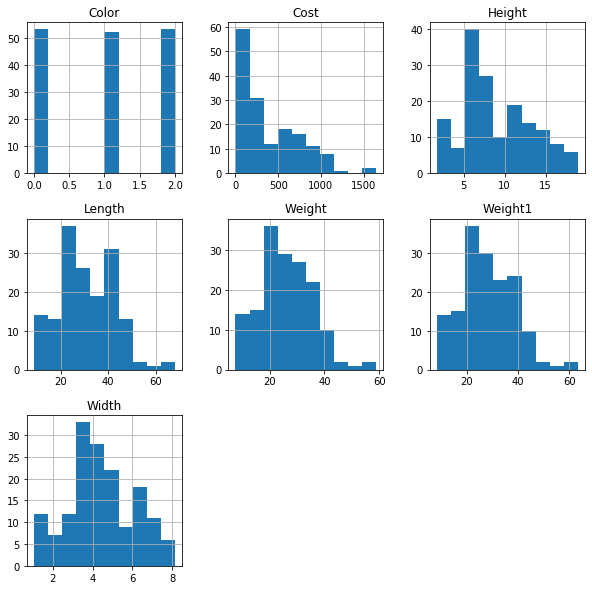

In [24]:
df.hist(figsize=(10,10))

##### 1.5 : As number of fetures are less so we can visualize the scatter plot for pair of features

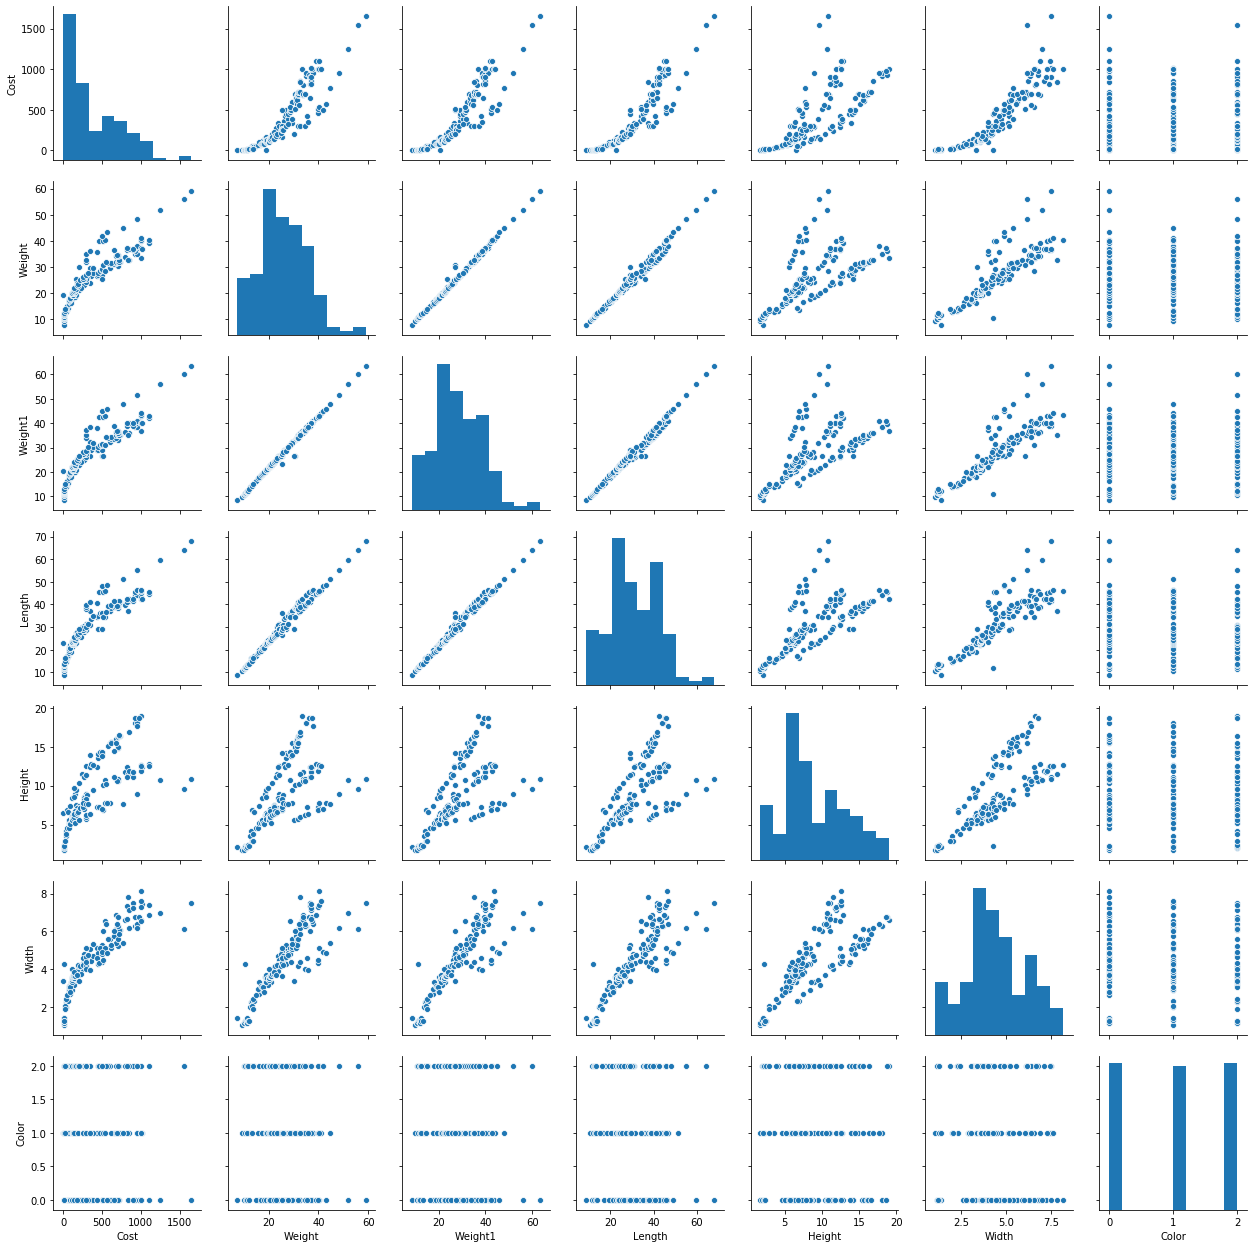

In [25]:
sns.pairplot(df)

##### 1.6 : Remove outliers

###### 1.6.1: From above histogram looks like cost is having some outliers at 0 and greater than 1300

In [26]:
df[df['Cost']==0]

,Cost,Weight,Weight1,Length,Height,Width,Color
40,0.0,19.0,20.5,22.8,6.4752,3.3516,1.0


In [27]:
df[df['Cost'] > 1300]

,Cost,Weight,Weight1,Length,Height,Width,Color
143,1550.0,56.0,60.0,64.0,9.600,6.144,2.0
144,1650.0,59.0,63.4,68.0,10.812,7.480,0.0


###### As we only one data point to zero and only two greater than 1300 hence we will remove them

In [28]:
df.drop(df[df['Cost']==0].index, inplace=True)
df.drop(df[df['Cost']>1300].index, inplace=True)

##### Finding outliers using boxplot

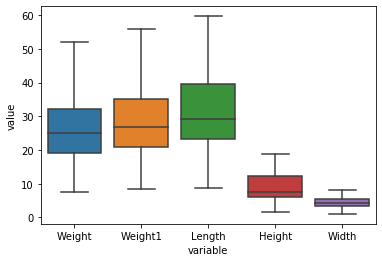

In [29]:
data = pd.melt(df[["Cost", "Weight", "Weight1", "Length", "Height", "Width"]].drop('Cost', axis=1))
sns.boxplot(x="variable", y="value", data=data)

##### From boxplot looks like all outliers already removed

### Task 2 : Plotting of various graphs & correlations

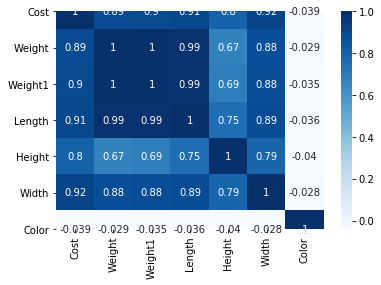

In [30]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

In [31]:
# Arrange correlation in ascending order
print(corr.abs().unstack().sort_values(ascending=False))

Color    Color      1.000000
Width    Width      1.000000
Weight   Weight     1.000000
Weight1  Weight1    1.000000
Height   Height     1.000000
Length   Length     1.000000
Cost     Cost       1.000000
Weight   Weight1    0.996551
Weight1  Weight     0.996551
Length   Weight1    0.991237
Weight1  Length     0.991237
Weight   Length     0.988190
Length   Weight     0.988190
Cost     Width      0.920578
Width    Cost       0.920578
Cost     Length     0.908469
Length   Cost       0.908469
Weight1  Cost       0.900422
Cost     Weight1    0.900422
         Weight     0.894028
Weight   Cost       0.894028
Length   Width      0.888136
Width    Length     0.888136
         Weight1    0.884297
Weight1  Width      0.884297
Width    Weight     0.878334
Weight   Width      0.878334
Height   Cost       0.799218
Cost     Height     0.799218
Width    Height     0.788121
Height   Width      0.788121
         Length     0.749463
Length   Height     0.749463
Height   Weight1    0.689916
Weight1  Heigh

###### Correlation between feature Weight and Weight1 is too high i.e. 0.996551 because of that need to drop one feature. Weight and Weight1 relation with cost is 0.894028 and 0.900422 respectively. As correlatin of Weight is less with cost so we will drop this feature

In [32]:
df.drop('Weight', axis=1, inplace=True)

###### Correlation between feature Weight1 and Length is too high i.e. 0.991237 because of that need to drop one feature. Weight1 and Length relation with cost is 0.900422 and 0.908469 respectively. As correlatin of Weight1 is less with cost so we will drop this feature

In [33]:
df.drop('Weight1', axis=1, inplace=True)

###### Correlation between feature Color and Cost is too low i.e. 0.039011 as a result we can drop this colomn.

In [34]:
df.drop('Color', axis=1, inplace=True)

### Task 3: Model Building using Multiple Linear Regression 

##### Spliting data into train and test

In [35]:
X = df[["Length", "Height", "Width"]]
Y = df['Cost']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

##### As different columns have different range of values hence dominance of few columns will be there in dataset. To avoid this we are converting it into standarize format

In [36]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

#### Task 3.1 : OLS Approach 

##### 3.1.1 : Training model

In [37]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### 3.1.2: Find the intercept, coefficient value and error term for this regression problem in Python. 

In [38]:
y_pred = reg_model.predict(X_test)
intercept = reg_model.intercept_
coefficient_value = reg_model.coef_

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:',metrics.explained_variance_score(y_test, y_pred))

print('Intercept : ', intercept)
print('Coefficent value: ', coefficient_value)

MAE: 83.52662476581526
MSE: 10304.94139087415
RMSE: 101.51325721734156
R2: 0.9084679681993689
Intercept :  363.5944444444445
Coefficent value:  [104.6532754   46.28352252 155.11235651]


##### Accuracy of model using OLS is approx. 90.84%

##### 3.1.3: Observation of OLS approach

In [39]:
coeffecients = pd.DataFrame(coefficient_value , X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Length,104.653275
Height,46.283523
Width,155.112357


##### Interpretation
- Considerting all other feature fixed if we increase **Lenght by 1 unit** then **cost of bag increse by 104.653275**
- Considerting all other feature fixed if we increase **Height by 1 unit** then **cost of bag increse by 46.283523**
- Considerting all other feature fixed if we increase **Width by 1 unit** then **cost of bag increse by 155.112357**

#### Task 3.2: Stochastic Gradient 

In [40]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [41]:
print(sgd.intercept_)

[363.63893915]


In [42]:
predictions_sgd = sgd.predict(X_test)

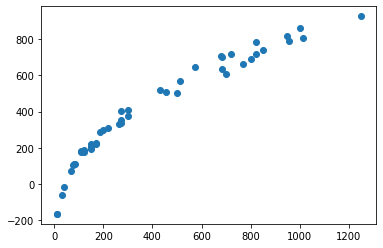

In [43]:
plt.scatter(y_test,predictions_sgd)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_sgd))
print('MSE:', metrics.mean_squared_error(y_test, predictions_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_sgd)))
print('r2:', metrics.r2_score(y_test, predictions_sgd))

MAE: 82.71473143856271
MSE: 10170.09246505589
RMSE: 100.84687632770729
r2: 0.9094693216812073


##### Accuracy of model using Stochastic Gradient is approx. 90.89%

In [45]:
coeff_df1 = pd.DataFrame(sgd.coef_, X.columns, columns=['Coefficient'])
coeff_df1

,Coefficient
Length,111.627640
Height,51.517871
Width,143.475760


##### Interpretation
- Considerting all other feature fixed if we increase **Lenght by 1 unit** then **cost of bag increse by 109.319370**
- Considerting all other feature fixed if we increase **Height by 1 unit** then **cost of bag increse by 48.250380**
- Considerting all other feature fixed if we increase **Width by 1 unit** then **cost of bag increse by 148.347153**

#### Task 3.3: Gradient Descent with at least two learning parameters  <br> (Try GD method with two different learning parameters and the compare them to identify the ignorance of learning parameter)

##### Scaling the data points

In [46]:
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,1:])
df.iloc[:,1:] = minmax_scale.transform(df.iloc[:,1:])

In [47]:
# Spliting training and testing data
X = df.iloc[:,1:].values
y = df.iloc[:,0:1].values
# Splitting the dataset by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [48]:
class GradientDescent:
    # Gradient Descent class which contains batch, mini-batch and stochastic gradient
    
    def __init__(self):
        # Constructor of Gradient Descent
        pass
        
    def get_metrics(self, x, y, theta):
        # To calculate the metrics like MAE, MSE, RMSE, R2 
        y_pred = [(theta[1] * x1) + (theta[2] * x2)+ (theta[3] * x3)+ theta[0] for x1,x2,x3 in x]
        mae = mean_absolute_error(y,y_pred)
        mse = mean_squared_error(y,y_pred)
        metrics = "MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(mae, mse, math.sqrt(mse), r2_score(y,y_pred))
        return metrics
    
    def h (self, theta, X) :
        # hypotheseis function to calculate the equation 
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        res = np.matmul(tempX, theta)
        return res
    
    def loss (self, theta, X, Y) :
        # Loss function to find the difference between actual and predicted values
        return np.average(np.square(Y - self.h(theta, X))) / 2
    
    def gradient(self, theta, X, Y):
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        d_theta = - np.average((Y - self.h(theta, X)) * tempX, axis= 0)
        d_theta = d_theta.reshape((d_theta.shape[0], 1))
        return d_theta
    
    def batch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        # Gradient or Batch function to calculate the gradient for the whole dataset
        cost = np.zeros(max_iteration)
        for i in range(max_iteration):
            d_theta = self.gradient (theta, X, Y)
            theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print('Iteration : ', i, '\t Loss : ', self.loss(theta, X, Y))
        return theta, cost

    def minibatch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, batch_size, gap):
        # Mini Batch Gradient Function to calculate the gradient by splitting the dataset by multiple batches
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(0, X.shape[0], batch_size):
                d_theta = self.gradient(theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
                theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print('Iteration : ', i, '\t Loss : ', self.loss(theta, X, Y))
        return theta, cost
    
    def stochastic_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        # Stochastic Gradient Function to calculate the gradient for all rows by looping the dataset
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(X.shape[0]):
                d_theta = self.gradient(theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
                theta = theta - learning_rate * d_theta    
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print('Iteration : ', i, '\t Loss : ', self.loss(theta, X, Y))
        return theta, cost

Iteration :  0 	 Loss :  111215.58612618622
Iteration :  1000 	 Loss :  10356.965024403538
Iteration :  2000 	 Loss :  6873.770422270068
Iteration :  3000 	 Loss :  6147.793767582344
Iteration :  4000 	 Loss :  5932.100526954214

Value of Theta : 
 [[-210.4302638 ]
 [ 458.89063885]
 [ 319.60030512]
 [ 546.03118912]]


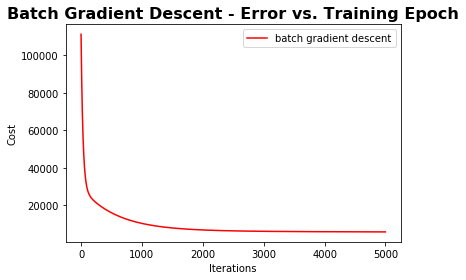

Batch Gradient Descent
MAE = 87.25079702858304, MSE = 11657.259851354207, RMSE = 107.96879109888286, R2 = 0.8781852503254833
MAE = 85.55350432891768, MSE = 11354.99835997933, RMSE = 106.55983464692187, R2 = 0.8989216954152778


In [49]:
# learning rate one
learning_rate = 0.01
max_iteration = 5000

theta = np.zeros((df.shape[1], 1))
batch_size = 10

gradient_obj = GradientDescent()

theta, cost = gradient_obj.batch_gradient_descent(theta, X_train, y_train, learning_rate, max_iteration, 1000)
print('\nValue of Theta : \n', theta)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

print('Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,theta ))
print(gradient_obj.get_metrics(X_test,y_test,theta ))

In [50]:
# learning rate two
mb_learning_rate = 0.05
mb_max_iteration = 10000

batch_size = 10
mb_theta = np.zeros((df.shape[1], 1))

mb_theta, mb_cost = gradient_obj.minibatch_gradient_descent (mb_theta, X_train, y_train,mb_learning_rate, mb_max_iteration, batch_size, 1000)
print('\nValue of Theta : \n', theta)

Iteration :  0 	 Loss :  41745.589419443204
Iteration :  1000 	 Loss :  5583.5579327580535
Iteration :  2000 	 Loss :  5583.602756668285
Iteration :  3000 	 Loss :  5583.606562166412
Iteration :  4000 	 Loss :  5583.606743866483
Iteration :  5000 	 Loss :  5583.606752407091
Iteration :  6000 	 Loss :  5583.606752808247
Iteration :  7000 	 Loss :  5583.606752827089
Iteration :  8000 	 Loss :  5583.606752827974
Iteration :  9000 	 Loss :  5583.606752828017

Value of Theta : 
 [[-210.4302638 ]
 [ 458.89063885]
 [ 319.60030512]
 [ 546.03118912]]


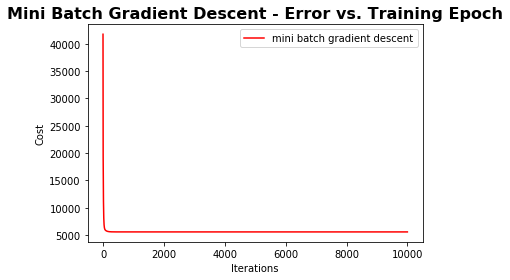

In [51]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(mb_max_iteration), mb_cost, 'r')  
ax.legend(loc='upper right', labels=['mini batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Mini Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [52]:
print('Mini Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,mb_theta ))
print(gradient_obj.get_metrics(X_test,y_test,mb_theta ))

Mini Batch Gradient Descent
MAE = 85.91480313007987, MSE = 11167.213505656036, RMSE = 105.6750372872233, R2 = 0.883306082638679
MAE = 83.54004379275085, MSE = 10470.34913650877, RMSE = 102.32472397474997, R2 = 0.9067965396755598


##### Efficiency of Gradient Descent and Mini Batch Gradient Descent model with two learning rate is as below
**Gradient Descent**
- Learning rate = 0.01 and Max iteration = 5000
- Accuracy of model is approx. 89.8% 
- PFB details values
- MAE = 85.55350432891768, MSE = 11354.998359979336, RMSE = 106.5598346469219, R2 = 0.8989216954152777

**Mini Batch Gradient Descent**
- Learning rate = 0.05 Max iteration = 10000
- Model accuracy is apporx. 90.6%
- PFB details values
- MAE = 83.54004379275084, MSE = 10470.34913650877, RMSE = 102.32472397474997, R2 = 0.9067965396755598

#### Task 4: Final conclusion

**Features**
- Color feature : This feature is not important as it is not making negligible impact on cost
- Weight, Weight1, Length, Height, Width : All this features are making significant impact on cost
- Correlation between Weight and Weight1 : Correlation between this two features is huge because of that while predicting cost we may drop one of this
- Correlation between Length and Weight, Length and Weight1 : Correlation between this pairs is also high. But correlation between Length and Cost is higher than Weight and Weight1 because of that we may ignore Weight and Weight1 while predicting cost

**Machine Learning model performance**
- **OLS(Linear Regression)** : Accuracy of model is approx. 90.84%
- **Stochastic Gradient** : Accuracy of model is approx. 90.89%
- **Gradient Descent(Learning rate = 0.01 and Max iteration = 5000)** : Accuracy of model is approx. 89.8%
- **Mini Batch Gradient Descent(Learning rate = 0.05 Max iteration = 10000)** : Accuracy of model is approx. 90.6%

### Best ML model based on accuracy parameter
So we can say, **Stochastic Gradient** is **the best model** which is giving **accuracy** of **approx. 90.89%** which is better than OLS(Linear Regression), Gradient Descent and Mini Batch Gradient Descent.